In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("insurance.csv")


In [3]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
25,0,25,0,1,

In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.describe().columns


Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
data['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:>

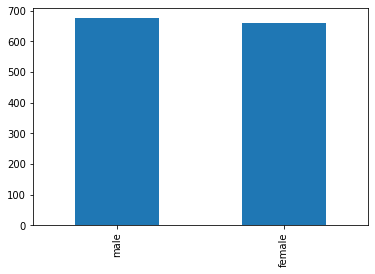

In [11]:
data['sex'].value_counts().sort_index(ascending=False).plot(kind='bar')

In [12]:
factors=['age', 'sex', 'bmi', 'children', 'charges']
data.groupby('sex')[factors].mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


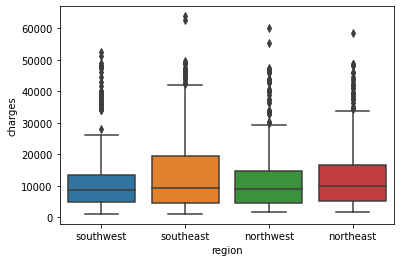

In [13]:
sns.boxplot(x='region', y='charges', data=data);

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [15]:
data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.region = le.fit_transform(data.region)

<AxesSubplot:xlabel='sex', ylabel='charges'>

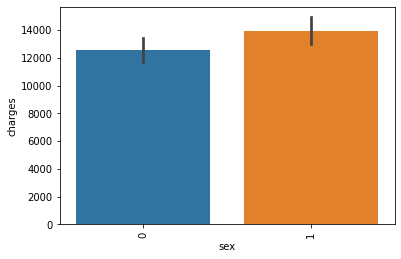

In [17]:
plt.xticks(rotation = 90)
sns.barplot(x = data.sex, y = data.charges)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

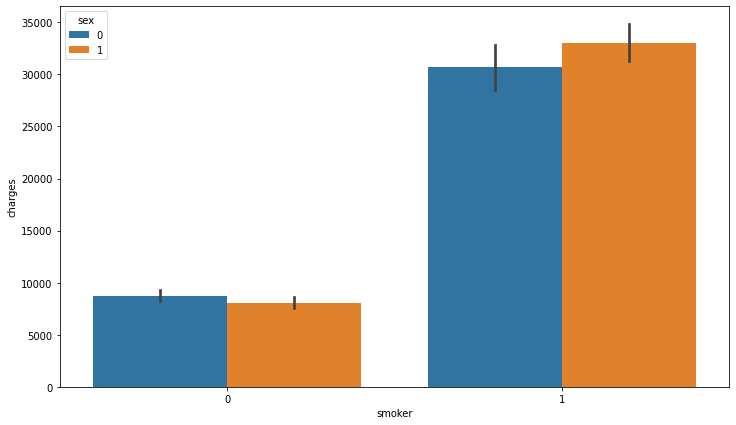

In [18]:
plt.figure(figsize = (12,7))
sns.barplot(x = data.smoker, y = data.charges, hue = data.sex)

In [46]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


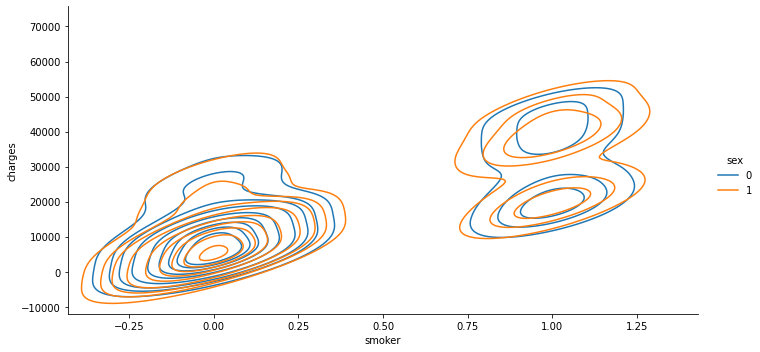

In [19]:
sns.displot(kind='kde', x='smoker', y = 'charges', hue='sex', data=data, aspect=2);

<AxesSubplot:xlabel='bmi', ylabel='smoker'>

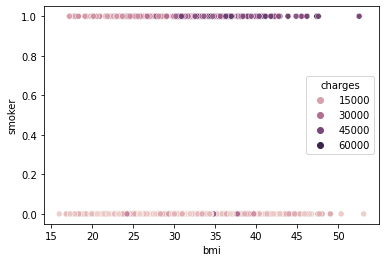

In [20]:
sns.scatterplot(x="bmi", y="smoker", hue = 'charges', data=data)

In [21]:
data_factors = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]


               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


<AxesSubplot:>

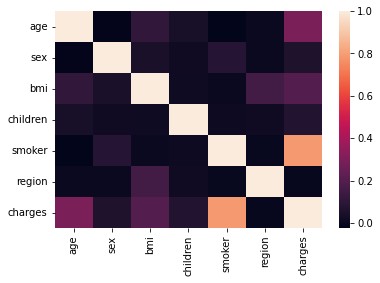

In [22]:
print(data_factors.corr())
sns.heatmap(data_factors.corr())


In [23]:
x = data.drop(['charges'], axis =1)

In [24]:
y = data.charges

In [25]:
x.shape


(1338, 6)

In [26]:
y.shape


(1338,)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)




In [28]:
model= LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.762823219804142
Testing Accuracy : 0.6797060498315322


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [32]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)


DecisionTreeRegressor()

In [33]:
y_pred = model1.predict(X_test)


In [34]:
print("Training Accuracy :", model1.score(X_train, y_train))
print("Testing Accuracy :", model1.score(X_test, y_test))


Training Accuracy : 0.9982823509662085
Testing Accuracy : 0.6876921841786222


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [36]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)


DecisionTreeRegressor()

In [37]:
y_pred = model2.predict(X_test)


In [38]:
print("Training Accuracy :", model2.score(X_train, y_train))
print("Testing Accuracy :", model2.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7552652288358289
